In [1]:
using FileIO, Images, VideoIO, Statistics, DelimitedFiles
# https://juliaio.github.io/VideoIO.jl/stable/reading/

In [17]:
function batchConvertVidToCroppedFrames(path, x₀, x₁, y₀, y₁, Δx, ndigits; invert = false, scaleFactor = 2/3)
    vid = VideoIO.openvideo(path) # open video i/o stream
    VideoIO.seekstart(vid) # reset stream frame/time to zero
    digitsEachFrame = Vector{Matrix{Float64}}[]; # array to save results in
    v = read(vid) # convert current frame of stream to image variable
    while !eof(vid)
        read!(vid,v) # advance the stream by one frame and update the image variable
        digits = [imresize(Gray.(v[y₀:y₁,(x₀:x₁) .+ i*Δx]),
        (30,20)).|> X -> (Int16∘round)((
                    invert ? scaleFactor*(1-Float64(X)) : scaleFactor*Float64(X)
                ),digits=0)
        for i in 0:(ndigits-1)]
        push!(digitsEachFrame,digits)

        # VideoIO.skipframes(vid,0,throwEOF=false)
    end

    matForm = [[reshape(Matrix{Int16}(X[Y]),30*20) for X in digitsEachFrame] for Y in (eachindex∘first)(digitsEachFrame)] .|> X -> (collect∘transpose∘reduce)(hcat,X)

    open("test.csv","w") do io
        writedlm(io,matForm[4])
    end
    return digitsEachFrame, matForm

end
A, Amat = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",255,255+29,450,450+44,35,6;scaleFactor=4/3);





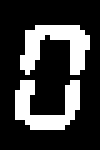

In [22]:
AAA=open("test.csv","r") do io
    readdlm(io)
end;
reshape(AAA[rand(begin:end),:],(30,20)) .|> Gray

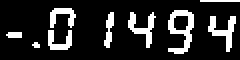

In [330]:
[Gray.(X) 
    # for X in A[1]
    for X in A[rand(begin:end)]
] |> Y->mosaicview(Y...;nrow=1)

In [331]:
using Random

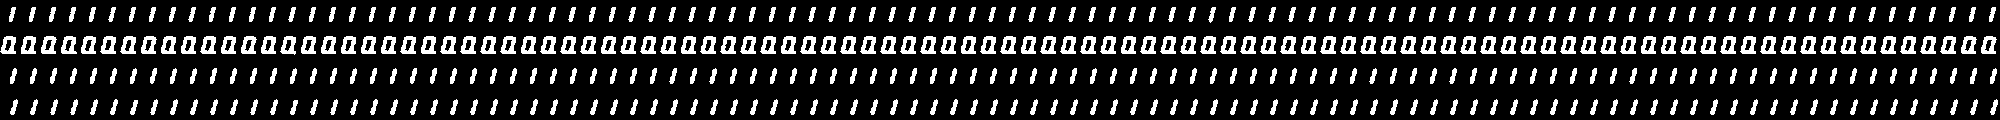

In [653]:
# meow = [[Matrix{Int16}(X[Y]) for X in A] for Y in eachindex(first(A))]# |> X->(X[6]) #.|> X -> Gray.(X);
# mew = (
# [[Matrix{Int16}(X[Y]) for X in A] for Y in eachindex(first(A))][2] .|> X -> reshape(X,600)
# ) |> X -> (collect∘transpose∘reduce)(hcat,X)
mew = [[reshape(Matrix{Int16}(X[Y]),600) for X in A] for Y in (eachindex∘first)(A)]  .|> X -> (collect∘transpose∘reduce)(hcat,X)
let indices =1:10:995# sort(shuffle(1:995)[1:100]);
    [[Gray.(reshape(m[i,:],(30,20))) for i in indices]  |> X->mosaicview(X...;nrow=1)  for m in mew] |> X->mosaicview(X...;ncol=1)
end
# secondDatMat = (
#     meow[2] .|> X -> reshape(X,600)
#     ) |> X -> (collect∘transpose∘reduce)(hcat,X)

In [333]:
using LinearAlgebra, StatsPlots
theme(:dao)

# Gray.(reshape(eigvecs(cov(mew[2]))' * (1 .== 1:600),(30,20)))
filter(>(0),eigvecs(cov(mew[2]))' * (1 .== 1:600)) #I'm pretty sure PCA just picks a few pixels it thinks are the most significant/variable

1-element Vector{Float64}:
 1.0

In [334]:
vid = VideoIO.openvideo("../Cu_Current_3.mp4")

VideoReader(...)

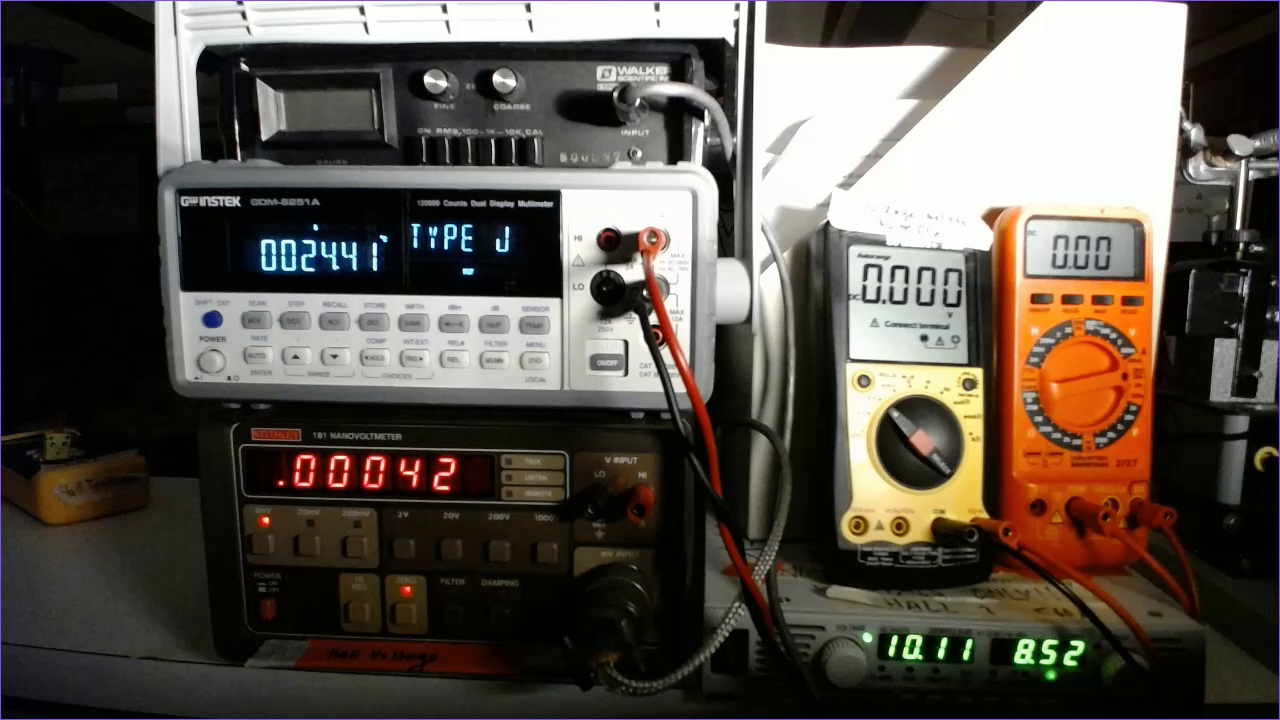

In [335]:
VideoIO.seek(vid,0) |> first

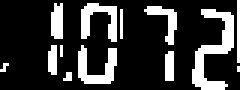

In [506]:
A = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",853,853+29,264,264+44,28,4;scaleFactor=1,invert=true);

# A = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",220,220+29,450,450+44,35);
[Gray.(X) 
    # for X in A[1]
    for X in A[rand(begin:end)]
][:] |> Y->mosaicview(Y...;nrow=1) 

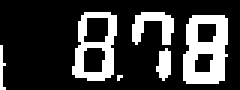

In [607]:
A = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",1025,1025+22,230,230+44,23,4;scaleFactor=1.08,invert=true);
mew=rand(1:995)
[Gray.(X) 
    # for X in A[1]
    for X in A[mew]
][1:4] |> Y->mosaicview(Y...;nrow=1) #|> size

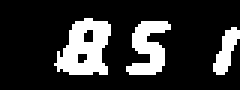

In [624]:
A = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",992,992+24,631,631+40,23,4;scaleFactor=1,invert=false);
mew=rand(1:995)
[Gray.(X) 
    for X in A[mew]
][:] |> Y->mosaicview(Y...;nrow=1)# |> size

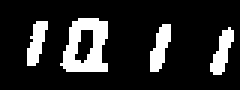

In [652]:
A = batchConvertVidToCroppedFrames("../Cu_Current_3.mp4",879,879+24,627,627+40,24,4;scaleFactor=1.05,invert=false);
mew=rand(1:995)
[Gray.(X) 
    for X in A[mew]
][1:4] |> Y->mosaicview(Y...;nrow=1) #|> size

In [341]:
# VideoIO.skipframes(vid,20)
VideoIO.counttotalframes(vid)

996

In [161]:
VideoIO.seekstart(vid)
A =Vector{Matrix{Float64}}[];
v = read(vid)
while !eof(vid)
    read!(vid,v)
    scaleFactor =3/2
    mew = [
        imresize(v[450:494,(220:249) .+ i*35] .|> Gray .|> X->(Int16∘round)(Float16(X),digits=0)/scaleFactor .|> Gray,ratio=2/3) .|> X -> round(scaleFactor*Float64(X),digits=0)
    for i in 1:6] 
    push!(A,mew)
    # VideoIO.skipframes(vid,0,throwEOF=false)
end



In [201]:
v |> typeof

PermutedDimsArray{RGB{N0f8}, 2, (2, 1), (2, 1), Matrix{RGB{N0f8}}}

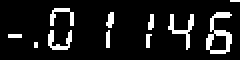

In [162]:
[Gray.(X) for X in A[rand(begin:end)]] |> Y->mosaicview(Y...;nrow=1)

In [163]:
meow = [[Matrix{Int16}(X[Y]) for X in A] for Y in eachindex(first(A))]# |> X->(X[6]) #.|> X -> Gray.(X);

In [175]:
secondDatMat = (
(meow[2] .|> X -> reshape(X,600)) |> X -> reduce(hcat,X)
)';

In [176]:
using LinearAlgebra

In [177]:
(eigvecs(cov(secondDatMat))) * diagm(eigvals(cov(secondDatMat))) * (eigvecs(cov(secondDatMat))') - cov(secondDatMat) |> X -> mean(abs,X)

2.1598624654078854e-19

In [178]:
using Plots

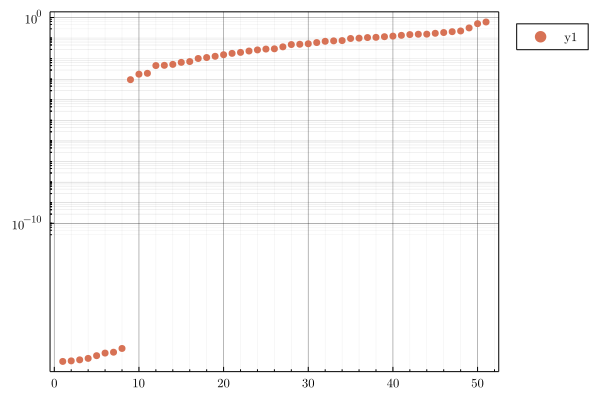

In [180]:
scatter(eigvals(cov(secondDatMat))[end-50:end],yscale=:log10)

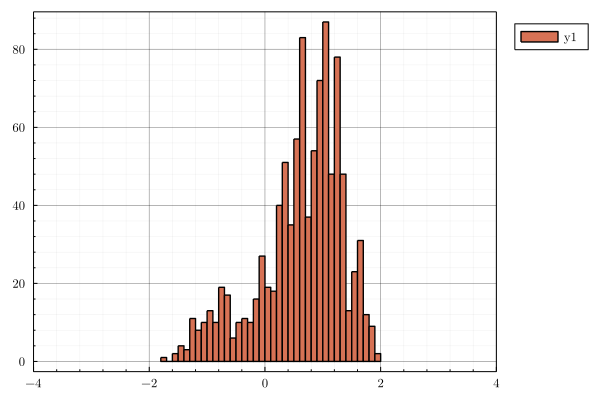

In [226]:
histogram((secondDatMat * eigvecs(cov(secondDatMat)))[:,end],bins=60,xlim=(-4,4))

In [183]:
using StatsPlots

In [184]:
theme(:dao)

In [185]:
XX=(eigvecs(cov(secondDatMat))' * cov(secondDatMat) * eigvecs(cov(secondDatMat)))[1,:];

In [186]:
minimum(XX)

-1.3670126875482654e-17

In [187]:
maximum(eigvals(cov(secondDatMat)))

0.6027119072392122

In [31]:
(eigvecs(cov(secondDatMat))) * diagm(eigvals(cov(secondDatMat))) * (eigvecs(cov(secondDatMat))') - cov(secondDatMat) |> X -> sum(abs2,X)

2.8498586084647583e-26

In [189]:
reduce(vcat,meow[1])

29850×20 Matrix{Int16}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 ⋮              ⋮              ⋮              ⋮           
 0  0  0  0  1  1  1  1  1  1  1  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0

In [355]:
using DelimitedFiles

open("test.csv","w") do io
    writedlm(io,reduce(vcat,meow[1]))
end